<a href="https://colab.research.google.com/github/1Un/MNIST/blob/master/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
import torchvision.datasets

In [3]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
len(y_train), len(y_test)

(60000, 10000)

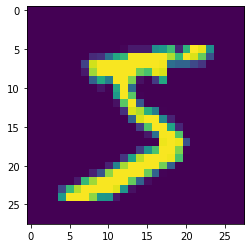

tensor(5)


In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [7]:
X_train.shape


torch.Size([60000, 28, 28])

In [0]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [9]:
X_train.shape
# отличие от полносвязанной сети, которая видела картинку как один вектор длинный,
# мы хотим в конволюционную сеть передавать картинку как трёхмерный тензор.
# Первый канал -- это глубина картинки, в черно-белой картинке это 1
# канал с яркостью серого пикселя. А в RGB картинке будут RGB каналы.
# Соответственно, мы должны нашу картинку, которая на вход пришла (она просто "28 на 28"),
# разжать до "1 на 28 на 28". Вот мы это и делаем -- мы делаем X_train.unsqueeze,
# а здесь ставим индекс: "а в каком же измерении мы хотим разжать".
# То есть X_train у нас -- тензор из 60 000 картинок 28 на 28,
# а мы хотим чтобы было 60 000 на 1 на 28 на 28, и то же самое мы делаем с тестом.

torch.Size([60000, 1, 28, 28])

In [0]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        #conv 2d называется так как матрица у нас двумерная  
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        #изображение в 1 вектор растянем в forward а пока в конструкторе прдеставим что это уже сделано
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    #x - входной тензор, т.е. батч из картинок 
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        #преобразуем наш тенхор к нужной размерности x.size(0) - размер батча 
        #а дальше тензор одномерный очевидно что бы получить этот размер надо
        #просто перемножить 3 размерности
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [11]:
!nvidia-smi



Wed Apr 29 13:37:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [14]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9759)
tensor(0.9810)
tensor(0.9856)
tensor(0.9857)
tensor(0.9889)
tensor(0.9887)
tensor(0.9872)
tensor(0.9866)
tensor(0.9883)
tensor(0.9889)
tensor(0.9875)
tensor(0.9900)
tensor(0.9879)
tensor(0.9883)
tensor(0.9890)
tensor(0.9892)
tensor(0.9898)
tensor(0.9907)
tensor(0.9893)
tensor(0.9891)
tensor(0.9878)
tensor(0.9891)
tensor(0.9878)
tensor(0.9850)
tensor(0.9895)
tensor(0.9892)
tensor(0.9890)
tensor(0.9872)
tensor(0.9890)
tensor(0.9880)
tensor(0.9885)
tensor(0.9891)
tensor(0.9874)
tensor(0.9872)
tensor(0.9872)
tensor(0.9892)
tensor(0.9901)
tensor(0.9898)
tensor(0.9887)
tensor(0.9883)
tensor(0.9885)
tensor(0.9896)
tensor(0.9874)
tensor(0.9897)
tensor(0.9892)
tensor(0.9911)
tensor(0.9893)
tensor(0.9898)
tensor(0.9887)
tensor(0.9901)
tensor(0.9877)
tensor(0.9898)
tensor(0.9898)
tensor(0.9886)
tensor(0.9859)
tensor(0.9889)
tensor(0.9887)
tensor(0.9875)
tensor(0.9903)
tensor(0.9891)
tensor(0.9900)
tensor(0.9873)
tensor(0.9875)
tensor(0.9896)
tensor(0.9905)
tensor(0.9889)
tensor(0.9

In [0]:
lenet5.forward(X_test)

tensor([[ -1.9876,  -3.3314,  -3.3752,  ...,  22.9870,  -7.1411,   2.9890],
        [  3.5234,  -0.5113,  26.2134,  ...,  -5.8840,   2.2897,  -6.4466],
        [ -4.4606,  23.4170,  -7.0617,  ...,   0.3518,   5.0255,  -6.4726],
        ...,
        [-10.7435,  -2.3816,  -5.2822,  ...,   1.0447,  -0.6425,   5.7037],
        [ -0.2828,  -7.6716,  -7.1941,  ...,  -7.8155,   6.8983,  -6.0403],
        [  0.1183,  -3.3469,   2.1859,  ..., -16.0532,   0.9160,  -7.3605]],
       device='cuda:0', grad_fn=<AddmmBackward>)

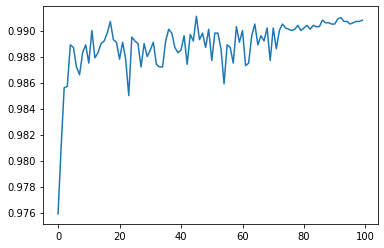

In [15]:
plt.plot(test_accuracy_history);


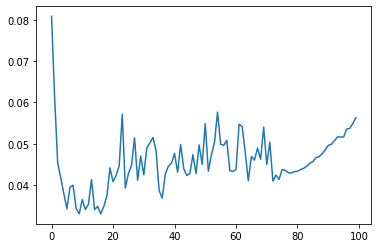

In [16]:
plt.plot(test_loss_history);


In [17]:
def sum_par(model):
  s=0
  for i in model.parameters():
    #print(i)
    print(len(i.reshape(-1)))
    s+=len(i.reshape(-1))
  return s
print('sum=',sum_par(lenet5))

150
6
2400
16
48000
120
10080
84
840
10
sum= 61706


In [18]:
import torchsummary
torchsummary.summary(lenet5.cuda(),(1,28,28))
#(1,28,28) - размер входного изображения 

# #for param in lenet5.parameters():
#  # print(param.data)
# i=lenet5.parameters()
# j=next(i)
# print(j.size())
# print(j)
# print('=========================')
# print(j[9,0,:,:].data())


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 120]          48,120
              Tanh-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

In [0]:
# plt.imshow(j[0,0, :, :].to('cpu'))
# plt.show()